In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("IMDb Movies India.csv", encoding="latin-1")

In [3]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [6]:
df.shape

(15509, 10)

In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
# df_cat=df.select_dtypes(np.object)
# df_num=df.select_dtypes(np.number)
catdf = [i for i in df.columns if df[i].dtypes=='O']
catdf

['Name',
 'Year',
 'Duration',
 'Genre',
 'Votes',
 'Director',
 'Actor 1',
 'Actor 2',
 'Actor 3']

In [9]:
numdf = [i for i in df.columns if df[i].dtypes!='O']

In [10]:
numdf

['Rating']

In [11]:
# Drop unnecessary columns
df.drop(['Name','Duration' ], axis=1, inplace=True)


### One Hot Encoding

In [12]:
# Step 1: Identify the problematic rows
mask = (df['Actor 1'].astype(str).str.strip() == '') | (df['Actor 2'].astype(str).str.strip() == '')
problematic_rows = df[mask]
print("Problematic rows:")
print(problematic_rows)

Problematic rows:
Empty DataFrame
Columns: [Year, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3]
Index: []


In [13]:
# Step 2: Handle missing or non-numeric values
default_value = 0 

In [14]:
df.dtypes

Year         object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [16]:
print(label_encoder)

LabelEncoder()


In [17]:
df["Actor 3"] = label_encoder.fit_transform(df["Actor 3"])
df["Actor 1"] = label_encoder.fit_transform(df["Actor 1"])
df["Actor 2"] = label_encoder.fit_transform(df["Actor 2"])
df["Rating"] = label_encoder.fit_transform(df["Rating"])
df["Director"] = label_encoder.fit_transform(df["Director"])
df["Genre"] = label_encoder.fit_transform(df["Genre"])

In [18]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,299,84,NaN,1926,2250,800,3108
1,(2019),299,56,8,1548,3280,4790,527
2,(2021),351,84,NaN,5123,3713,2866,3450
3,(2019),228,30,35,3319,2917,1504,4020
4,(2010),299,84,NaN,385,3112,3462,405


In [19]:
df.tail()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,(1988),0,32,11,2690,2586,4299,4262
15505,(1999),40,31,655,2499,227,4532,519
15506,(2005),0,84,NaN,2424,3609,4891,4820
15507,(1988),0,84,NaN,5938,4718,4891,4820
15508,(1998),40,48,20,2195,1139,1589,490


In [20]:
df.shape

(15509, 8)

In [21]:
df.columns

Index(['Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      14981 non-null  object
 1   Genre     15509 non-null  int32 
 2   Rating    15509 non-null  int64 
 3   Votes     7920 non-null   object
 4   Director  15509 non-null  int32 
 5   Actor 1   15509 non-null  int32 
 6   Actor 2   15509 non-null  int32 
 7   Actor 3   15509 non-null  int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 666.5+ KB


In [23]:
df.describe()

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
count,15509.000000,15509.000000,15509.000000,15509.000000,15509.000000,15509.000000
mean,271.536205,63.788188,2987.815075,2574.342833,2832.121671,2869.035915
std,164.410098,22.113489,1717.609627,1456.514606,1542.495914,1555.151952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,46.000000,1531.000000,1302.000000,1518.000000,1542.000000
50%,299.000000,69.000000,2922.000000,2581.000000,2876.000000,2905.000000
75%,409.000000,84.000000,4416.000000,3821.000000,4286.000000,4489.000000
max,485.000000,84.000000,5938.000000,4718.000000,4891.000000,4820.000000


In [24]:
df.isnull().sum()

Year         528
Genre          0
Rating         0
Votes       7589
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [25]:
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,299,84,NaN,1926,2250,800,3108
1,(2019),299,56,8,1548,3280,4790,527
2,(2021),351,84,NaN,5123,3713,2866,3450
3,(2019),228,30,35,3319,2917,1504,4020
4,(2010),299,84,NaN,385,3112,3462,405
...,...,...,...,...,...,...,...,...
15504,(1988),0,32,11,2690,2586,4299,4262
15505,(1999),40,31,655,2499,227,4532,519
15506,(2005),0,84,NaN,2424,3609,4891,4820
15507,(1988),0,84,NaN,5938,4718,4891,4820


In [26]:
df['Actor 1'] = df['Actor 1'].fillna(df['Actor 1'].mode()[0])

In [27]:
df['Actor 2'] = df['Actor 2'].fillna(df['Actor 2'].mode()[0])

In [28]:
df['Actor 3'] = df['Actor 3'].fillna(df['Actor 2'].mode()[0])

In [29]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [30]:
df['Director'] = df['Director'].fillna(df['Director'].mode()[0]) 

In [31]:
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0]) 

In [32]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,299,84,NaN,1926,2250,800,3108
1,(2019),299,56,8,1548,3280,4790,527
2,(2021),351,84,NaN,5123,3713,2866,3450
3,(2019),228,30,35,3319,2917,1504,4020
4,(2010),299,84,NaN,385,3112,3462,405


In [33]:
df['Actor 1'].value_counts()


4718    1617
636      158
1682     140
1139     140
2402     133
        ... 
69         1
3858       1
1891       1
697        1
3609       1
Name: Actor 1, Length: 4719, dtype: int64

In [34]:
df['Actor 2'].value_counts()

4891    2384
3402      83
1402      72
2378      63
1043      61
        ... 
2815       1
4068       1
254        1
649        1
3758       1
Name: Actor 2, Length: 4892, dtype: int64

In [35]:
df['Actor 3'].value_counts()

4820    3144
2847      91
3815      65
430       64
1604      59
        ... 
2403       1
1735       1
228        1
1898       1
4262       1
Name: Actor 3, Length: 4821, dtype: int64

In [36]:
df['Genre'].value_counts()

299    2780
485    1877
0      1289
479     779
460     708
       ... 
75        1
410       1
151       1
461       1
127       1
Name: Genre, Length: 486, dtype: int64

In [37]:
df['Director'].value_counts()

5938    525
2034     58
2304     57
855      50
2696     48
       ... 
3100      1
4789      1
3065      1
2531      1
2424      1
Name: Director, Length: 5939, dtype: int64

In [38]:
df['Rating'].value_counts()

84    7590
48     269
54     264
51     254
52     239
      ... 
82       1
1        1
83       1
81       1
0        1
Name: Rating, Length: 85, dtype: int64

In [39]:
df.isnull().sum()

Year         528
Genre          0
Rating         0
Votes       7589
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [40]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,299,84,NaN,1926,2250,800,3108
1,(2019),299,56,8,1548,3280,4790,527
2,(2021),351,84,NaN,5123,3713,2866,3450
3,(2019),228,30,35,3319,2917,1504,4020
4,(2010),299,84,NaN,385,3112,3462,405


C:\Users\kumar\AppData\Local\Temp\ipykernel_14316\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

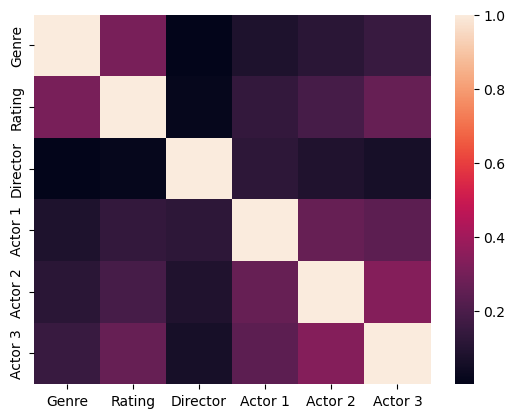

In [41]:
sns.heatmap(df.corr())

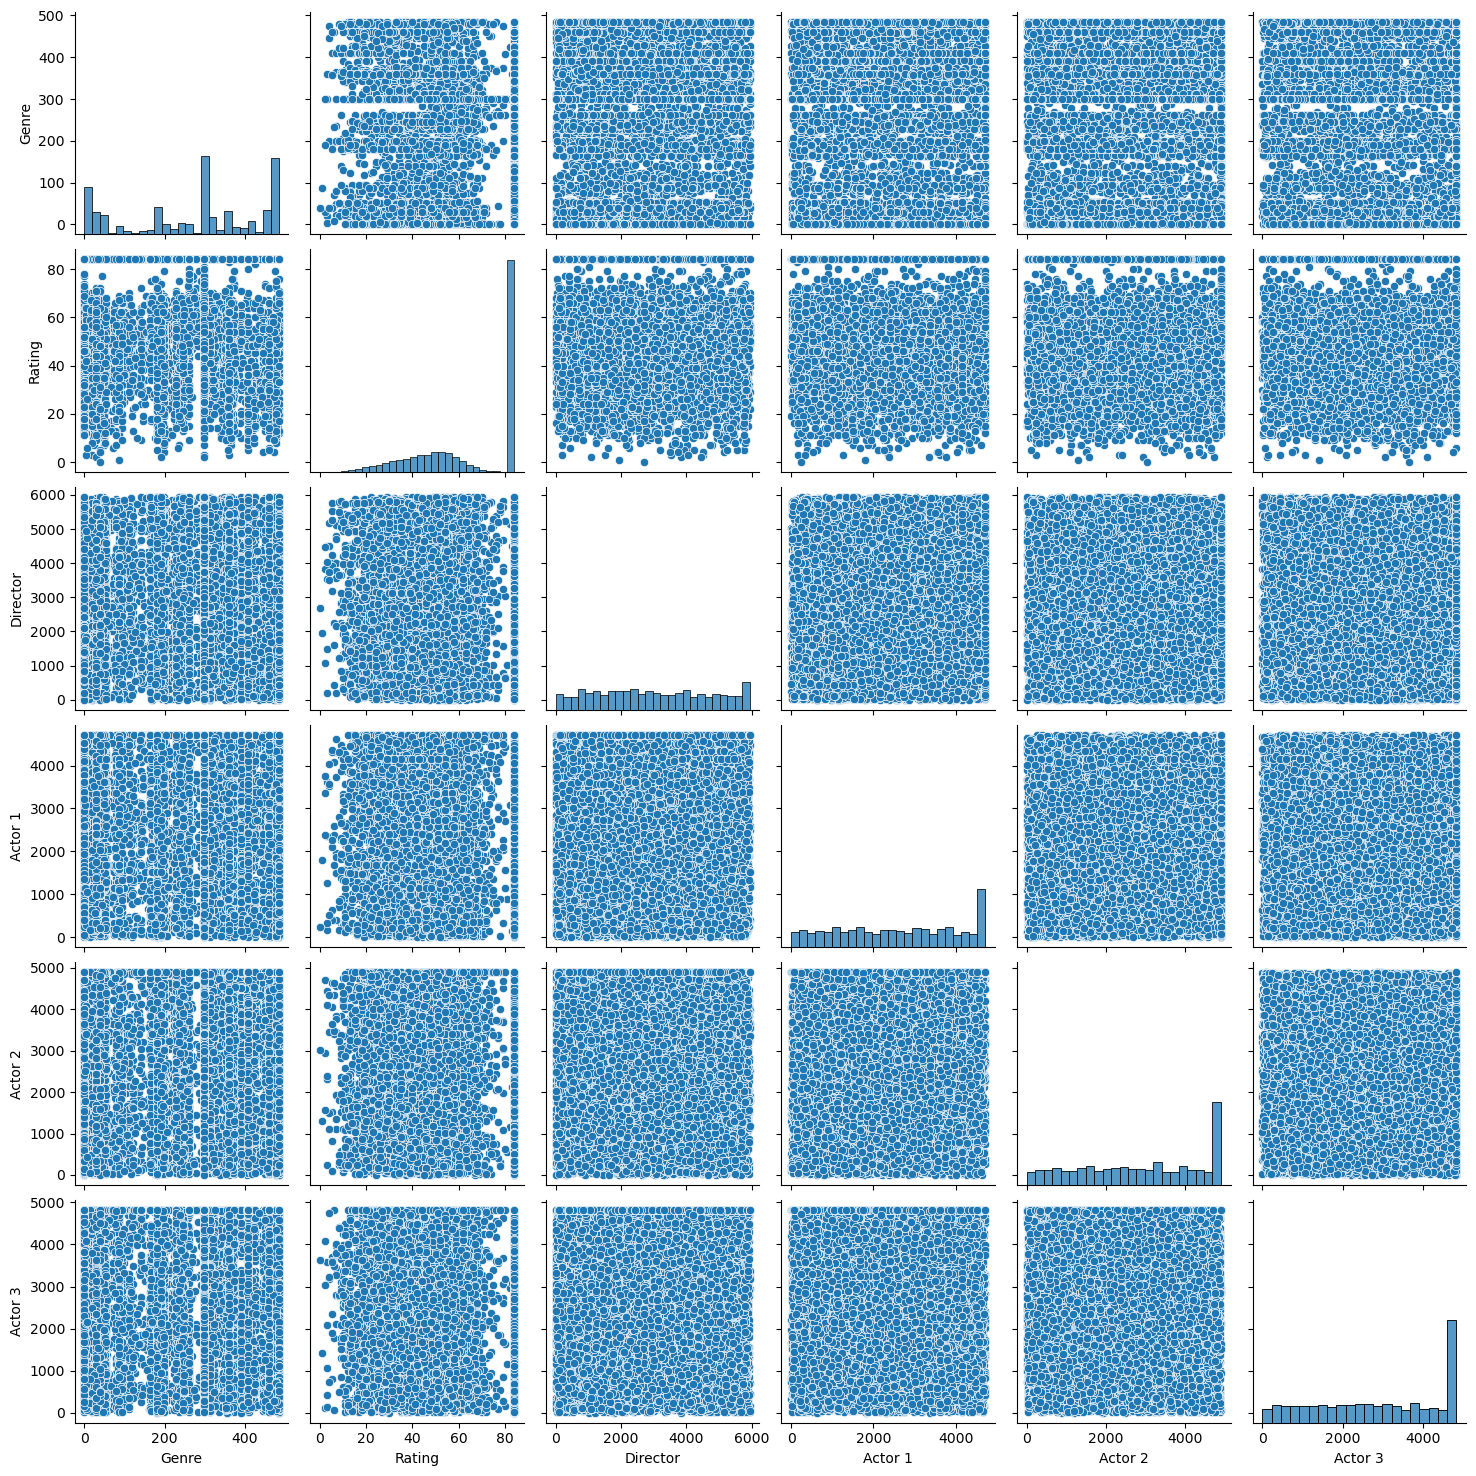

In [42]:
sns.pairplot(df)

<Axes: ylabel='count'>

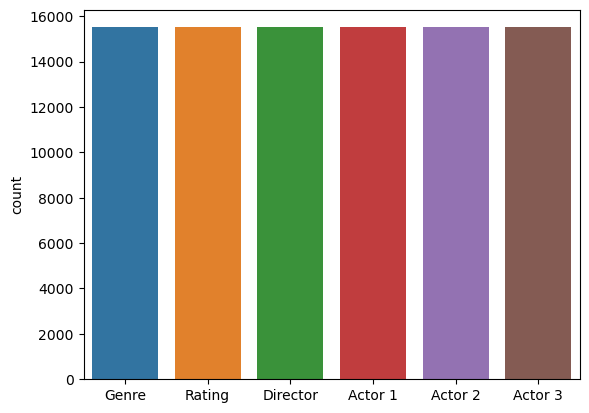

In [43]:
sns.countplot(df)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      14981 non-null  object
 1   Genre     15509 non-null  int32 
 2   Rating    15509 non-null  int64 
 3   Votes     7920 non-null   object
 4   Director  15509 non-null  int32 
 5   Actor 1   15509 non-null  int32 
 6   Actor 2   15509 non-null  int32 
 7   Actor 3   15509 non-null  int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 666.5+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Director', 'Genre', 'Actor 1']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())


     Year  Genre  Rating Votes  Director  Actor 1  Actor 2  Actor 3
0     NaN    299      84   NaN      1926     2250      800     3108
1  (2019)    299      56     8      1548     3280     4790      527
2  (2021)    351      84   NaN      5123     3713     2866     3450
3  (2019)    228      30    35      3319     2917     1504     4020
4  (2010)    299      84   NaN       385     3112     3462      405


In [46]:
label_encoder = LabelEncoder()
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])

In [47]:
# Split the dataset into features (independent variables)and target (dependent variable)
from sklearn.model_selection import train_test_split
X = df[['Actor 1', 'Actor 2', 'Actor 3','Director']]  # Features
y = df['Rating'] # Using 'max_sal' as the target for classification as wel


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem

#### 2.The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

### 3. Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

## RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier(max_depth=6)
reg.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [50]:
# Standardize the features
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification model (Random Forest Classifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_class = clf.predict(X_test_scaled)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy of the classification model:", accuracy)

Accuracy of the classification model: 0.48065764023210833


### DecisionTreeRegressor

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [53]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the regression model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) of the regression model:", mse)


Mean Squared Error (MSE) of the regression model: 910.3094777562862


In [54]:
print("Train Accuracy :", reg.score(X_train, y_train))
print("Test Accuracy :", reg.score(X_test, y_test))

Train Accuracy : 0.18363134654693214
Test Accuracy : 0.17218113576086203
